<a href="https://colab.research.google.com/github/Gitanjali1992/pandas/blob/main/Series_Methods_and_Handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Reading in Data with read.csv()

In [2]:
data_url = 'https://andybek.com/pandas-drinks'

In [3]:
pd.read_csv(data_url)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,1.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,NaN,NaN,0.1
191,Zambia,32.0,19.0,4.0,2.5


In [4]:
# Extracting only selective columns from above returned data frame 
# by using parameters of read_csv: usecols
pd.read_csv(data_url, usecols = ['country', 'wine_servings'])

,country,wine_servings
0,Afghanistan,NaN
1,Albania,54.0
2,Algeria,14.0
3,Andorra,312.0
4,Angola,45.0
...,...,...
188,Venezuela,3.0
189,Vietnam,1.0
190,Yemen,NaN
191,Zambia,4.0


In [5]:
# making country as index of the series 
# by using parameters of read_csv: index_col
pd.read_csv(data_url, usecols = ['country', 'wine_servings'], index_col = 'country')

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0
...,...
Venezuela,3.0
Vietnam,1.0
Yemen,NaN


In [6]:
alcohol = pd.read_csv(data_url, usecols = ['country', 'wine_servings'], index_col = 'country')

In [7]:
alcohol

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0
...,...
Venezuela,3.0
Vietnam,1.0
Yemen,NaN


In [8]:
type(alcohol)

pandas.core.frame.DataFrame

In [9]:
# squeeze parameter i read_csv():
# if parsed data has only one column, it returns a series
alcohol = pd.read_csv(data_url, usecols = ['country', 'wine_servings'], index_col = 'country', squeeze = True)

In [10]:
type(alcohol)

pandas.core.series.Series

In [11]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

# Series Sizing WIth .size , .shape And len()

In [12]:
alcohol.size

193

In [13]:
alcohol.values

array([ nan,  54.,  14., 312.,  45.,  45., 221.,  11., 212., 191.,   5.,
        51.,   7.,  nan,  36.,  42., 212.,   8.,  13.,  nan,   8.,   8.,
        35.,  16.,   1.,  94.,   7.,  nan,   7.,  16.,   1.,   4.,   1.,
         1.,   1., 172.,   8.,   3.,   1.,   9.,  74.,  11., 254.,   5.,
       113., 134.,  nan,   1., 278.,   3.,  26.,   9.,   3.,   1.,   2.,
       233.,  nan,  59.,  nan,   1.,  97.,  37.,  59.,   1., 149., 175.,
         1., 218.,  28.,   2.,   2.,  21.,   1.,   1.,   2., 185.,  78.,
        nan,  nan,  nan,  nan, 165.,   9., 237.,   9.,  16.,   1.,  12.,
         2.,   1.,  nan,   6., 123.,  62.,  31.,  nan,   2.,  nan,  56.,
       271.,   4.,   1.,  nan,  nan,   1.,  12.,  nan,  nan,  18.,   5.,
        18.,  nan,   8., 128.,   1.,   5.,  nan,   1.,   8.,  nan,  19.,
       175.,   1.,   1.,   2.,   7., 129.,   1.,  nan,  23.,  18.,   1.,
        74.,  21.,   1.,  56., 339.,   7.,   9.,  18., 167.,  73.,  nan,
        32.,  71.,  11.,  24.,  nan,  14.,  nan,   

In [14]:
alcohol.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [15]:
alcohol.values.size

193

In [16]:
alcohol.index.size

193

In [17]:
alcohol.values.size == alcohol.index.size

True

In [18]:
alcohol.shape

(193,)

In [19]:
alcohol.size == alcohol.shape[0]
# Length of sesries = First element of Tuple returned by .shape
# Series is one-dimensional, hence .shape returns tuple with only one value: (193,0)

True

# Unique Values and Series Monotonicity

Uniqueness

In [40]:
alcohol.is_unique

False

In [41]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [42]:
alcohol.head().is_unique

True

In [43]:
alcohol.head().nunique()
# Gives 1 less than true number of unique values bcoz it excludes names.

4

In [44]:
alcohol.head().nunique(dropna = False)

5

Monotonicity

In [45]:
pd.Series([1,2,3]).is_monotonic

True

In [46]:
pd.Series([1,2,3,3,3,3]).is_monotonic

True

In [47]:
pd.Series([1,2,3,3,3,3,4,74,100,189,1000]).is_monotonic

True

In [48]:
pd.Series([1,2,3,3,3,3,4,74,100,189,1000,9]).is_monotonic

False

In [49]:
pd.Series([1,2,3,3,3,3,4,74,100,189,1000,9,99, 100]).is_monotonic

False

In [50]:
pd.Series([1,2,3,3,3,3,4,74,100,189,1000]).is_monotonic_increasing
# .is_monotonic is an alias to .is_monotonic_increasing

True

In [51]:
pd.Series(reversed([1,2,3,3,3,3,4,74,100,189,1000])).is_monotonic

False

In [52]:
pd.Series(reversed([1,2,3,3,3,3,4,74,100,189,1000])).is_monotonic_increasing

False

In [53]:
pd.Series(reversed([1,2,3,3,3,3,4,74,100,189,1000])).is_monotonic_decreasing

True

# The count() Method

In [54]:
alcohol.count()
# Return the number of Non-NA/null values in series

162

In [55]:
alcohol.size
# Returns the number of values in series

193

In [56]:
alcohol.hasnans
# returns True if series has NA/null values

True

# Accessing and Counting NAs

Accessing Nulls in Series

In [57]:
alcohol.isnull()

country
Afghanistan     True
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen           True
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [58]:
alcohol[alcohol.isnull()]

country
Afghanistan        NaN
Bangladesh         NaN
Bhutan             NaN
Burundi            NaN
North Korea        NaN
Eritrea            NaN
Ethiopia           NaN
India              NaN
Indonesia          NaN
Iran               NaN
Iraq               NaN
Kuwait             NaN
Lesotho            NaN
Libya              NaN
Malaysia           NaN
Maldives           NaN
Marshall Islands   NaN
Mauritania         NaN
Monaco             NaN
Myanmar            NaN
Nepal              NaN
Pakistan           NaN
Rwanda             NaN
San Marino         NaN
Saudi Arabia       NaN
Somalia            NaN
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, dtype: float64

In [59]:
alcohol[alcohol.isnull()].index

Index(['Afghanistan', 'Bangladesh', 'Bhutan', 'Burundi', 'North Korea',
       'Eritrea', 'Ethiopia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Kuwait',
       'Lesotho', 'Libya', 'Malaysia', 'Maldives', 'Marshall Islands',
       'Mauritania', 'Monaco', 'Myanmar', 'Nepal', 'Pakistan', 'Rwanda',
       'San Marino', 'Saudi Arabia', 'Somalia', 'Sri Lanka', 'Sudan',
       'Tajikistan', 'Uganda', 'Yemen'],
      dtype='object', name='country')

In [60]:
type(alcohol[alcohol.isnull()].index)

pandas.core.indexes.base.Index

In [61]:
list(alcohol[alcohol.isnull()].index)

['Afghanistan',
 'Bangladesh',
 'Bhutan',
 'Burundi',
 'North Korea',
 'Eritrea',
 'Ethiopia',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Kuwait',
 'Lesotho',
 'Libya',
 'Malaysia',
 'Maldives',
 'Marshall Islands',
 'Mauritania',
 'Monaco',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Rwanda',
 'San Marino',
 'Saudi Arabia',
 'Somalia',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Uganda',
 'Yemen']

Counting Nulls in Series

In [62]:
len(list(alcohol[alcohol.isnull()].index))
# Cumbersome way

31

In [63]:
# Pandorable way
# Booleans are integers in Python: 
# True ~ 1
# False ~ 0
# .sum() simply performs arithmatic sum of booleans to sum of 0s and 1s
alcohol.isnull().sum()

31

In [64]:
sum([True, False, True])
#  sum(1,0,1)

2

In [65]:
all = alcohol.size
nonnulls = alcohol.count()
nulls = alcohol.isnull().sum()
all == nonnulls + nulls

True

In [66]:
alcohol.isna()
# .isnull() an alias to .isna()

country
Afghanistan     True
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen           True
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

# Bonus: Another Approach

In [67]:
ser = pd.Series(data = [True, False, None, 2], dtype = float)

In [68]:
ser

0    1.0
1    0.0
2    NaN
3    2.0
dtype: float64

In [69]:
np.isnan(ser)

0    False
1    False
2     True
3    False
dtype: bool

In [70]:
# can also pass numpy ufuncs as reference to series
alcohol[np.isnan]
# indexing by callables

country
Afghanistan        NaN
Bangladesh         NaN
Bhutan             NaN
Burundi            NaN
North Korea        NaN
Eritrea            NaN
Ethiopia           NaN
India              NaN
Indonesia          NaN
Iran               NaN
Iraq               NaN
Kuwait             NaN
Lesotho            NaN
Libya              NaN
Malaysia           NaN
Maldives           NaN
Marshall Islands   NaN
Mauritania         NaN
Monaco             NaN
Myanmar            NaN
Nepal              NaN
Pakistan           NaN
Rwanda             NaN
San Marino         NaN
Saudi Arabia       NaN
Somalia            NaN
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, dtype: float64

In [71]:
alcohol[np.isnan].size

31

In [72]:
# alcohol[alcohol.isna()] ~ alcohol[np.isnan]
# both approacjes are same but numpy approach is more elegant

# The Other Side: notnull() And notna()

In [73]:
alcohol.notnull()

country
Afghanistan    False
Albania         True
Algeria         True
Andorra         True
Angola          True
               ...  
Venezuela       True
Vietnam         True
Yemen          False
Zambia          True
Zimbabwe        True
Name: wine_servings, Length: 193, dtype: bool

In [74]:
alcohol[alcohol.notnull()]
# equivalent to alcohol.loc[alcohol.notnull()]

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [75]:
alcohol.notnull().sum()
# equivalent to alcohol.count()

162

In [76]:
alcohol.notnull().sum() + alcohol.isnull().sum() == alcohol.size

True

In [77]:
# .notna() is alias to .notnull()
alcohol.notna().sum() + alcohol.isna().sum() == alcohol.size

True

# Bonus: Booleans are Literally Numbers in Python

bool type inherits from int
bool --> int --> Object

In [83]:
type(True)

bool

In [84]:
type(False)

bool

In [85]:
# Method resolution order
bool.__mro__

(bool, int, object)

In [86]:
True + 19

20

In [87]:
True + True - False + 3

5

# Skill Challenge

Isolate the not nulls in *alcohol* series and assign them to a variable *wine_servings*.

In [88]:
wine_servings = alcohol[alcohol.notnull()]
wine_servings

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

What is the total wine consumed by countries in *wine_servings*?


In [89]:
wine_servings.sum()

8221.0

In the wine_servings dataset, what was the total wine consumed by countries that consumed less than 100 servings?


In [90]:
filter_servings = wine_servings[lambda x: [True if i<100 else False for i in x]]

In [91]:
filter_servings.sum()

2416.0

Another approach to:

In the wine_servings dataset, what was the total wine consumed by countries that consumed less than 100 servings?


In [92]:
wine_servings < 100

country
Albania               True
Algeria               True
Andorra              False
Angola                True
Antigua & Barbuda     True
                     ...  
Vanuatu               True
Venezuela             True
Vietnam               True
Zambia                True
Zimbabwe              True
Name: wine_servings, Length: 162, dtype: bool

In [93]:
wine_servings[wine_servings < 100]

country
Albania              54.0
Algeria              14.0
Angola               45.0
Antigua & Barbuda    45.0
Armenia              11.0
                     ... 
Vanuatu              11.0
Venezuela             3.0
Vietnam               1.0
Zambia                4.0
Zimbabwe              4.0
Name: wine_servings, Length: 132, dtype: float64

In [94]:
wine_servings[wine_servings < 100].sum()

2416.0

# Dropping and Filling NAs

Drop NaNs

In [95]:
alcohol.dropna()

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [96]:
alcohol.dropna().size == alcohol.notnull().sum()

True

In [97]:
# Original series not altered:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [98]:
# one way to alter series is using Reassignment:
# alcohol = alcohol.dropna()

In [99]:
# Another way to use inplace param
# alcohol.dropna(inplace = True)
# By default inplace parameter is set to False
# So when we do:
# alcohol.dropna() ~ alcohol.dropna(inplace = False)

Fill NaNs

In [102]:
alcohol.fillna(100, inplace = False)
# this is equivalent to: alcohol.fillna(100)
# inplace param if set to True will alter the original series

country
Afghanistan    100.0
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          100.0
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

# Descriptove Statistics

In [103]:
# Average
# alcohol.sum()/alcohol.count()
alcohol.mean()

50.74691358024691

In [104]:
# Median
alcohol.median()

11.5

In [106]:
# Median- Another way
# alcohol.quantile(q=.5) ~ alcohol.quantile(.5)
alcohol.quantile(.5)

11.5

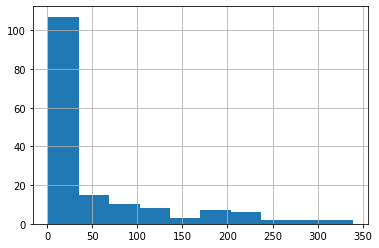

In [107]:
# Understanding skew via data visulization in Pandas:
alcohol.hist()

In [108]:
# iqr
iqr = alcohol.quantile(.75) - alcohol.quantile(.25)
iqr

58.25

In [109]:
# Min and Max
alcohol.min()

1.0

In [110]:
alcohol.max()

339.0

In [112]:
# Standard Deviation:
# is the square root of the variance
alcohol.std()

76.13491716376171

In [113]:
# Variance
alcohol.var()

5796.5256115328575

In [114]:
alcohol.std()**2 == alcohol.var()

True